## samples to run pylamost

In order to access protected LAMOST data, you should provide your token.
Your token can be obtained at http://www.lamost.org/lmusers/user/, find the "Your pylamost Token".
When you get your token you can also create a file `~/pylamost.ini` or `%userprofile%/pylamost.ini` on Windows, with content:
```
token=12345678
```
Then you don't have to write the token next time.

In [1]:
from pylamost import lamost
lm=lamost(dr_version='dr10', sub_version='v2.0')#init the lamost class
#lm.token='12345678'#specify your token. You can pass this step, if you created the ~/pylamost.ini file.
#Using international released data, token can be skip, except sql() function.

### Query interface

In [2]:
# query low resolution catalog by obsid
params={
        "column_constraints": [
            {
            "column_name": "obsid",
            "constraint": "195309107",
            "operation": "equal"
            },
            {
            "column_name": "teff",
            "max": 3700,
            "min": 3500,
            "operation": "between"
            }
        ],
        "limit": 100,
        "offset": 0,
        "order": "asc",
        "pos": {
            "proximity": {
                "defaultRadius": 2,
                "proximity_nearestonly": False,
                "radecTextarea": "#ra,dec,sep\n11.455864,34.420161,2.0"
            }
        },
        "pos_group": "ra,dec",
        "showcol": [
            "obsid",
            "ra",
            "dec",
            "teff",
            "teff_err",
            "snrg",
            "snri",
            "snrr",
            "snru",
            "snrz"
        ],
        "sort": "obsid",
        "output.fmt": "json"
    }
low=lm.query_table('combined', params)
print(low)

[{'dist_arcsec': 0.36000000000382437, 'input_line': 2, 'input_ra': '11.455864', 'input_dec': '34.420161', 'obsid': 195309107, 'snru': '0.27', 'snrg': '7.91', 'snrr': '23.31', 'snri': '56.76', 'snrz': '47.94', 'ra': '11.4558640000', 'dec': '34.4202610000', 'teff': '3528.41', 'teff_err': '99.08'}]


In [3]:
#查询中分数据
params['column_constraints']=[]
params['pos']['proximity']['radecTextarea']='229.2822975,55.4999767,2'
params['showcol']=['obsid','mobsid','ra','dec','snr']
med=lm.query_table('med_combined', params)
print(med)

[{'dist_arcsec': 0.0, 'input_line': 1, 'input_ra': '229.2822975', 'input_dec': '55.4999767', 'mobsid': '66740618783914423B', 'obsid': 667406187, 'snr': '12.19', 'ra': '229.2822975000', 'dec': '55.4999767000'}]


### SQL query interface

In [4]:
s=lm.sql("select c.obsid,c.obsdate, c.ra, c.dec, c.z, c.lmjd from catalogue c where spos(c.ra,c.dec) @ scircle '<(331.7d, -1.4d),0.2d>' limit 5", fmt='csv')
print(s)

﻿obsid,obsdate,ra,dec,z,lmjd
372209182,2015-10-17,331.8409248000,-1.5136398000,0.0000290900,57313
372209177,2015-10-17,331.8141332000,-1.4675555000,0.0000261514,57313
372209050,2015-10-17,331.5970331000,-1.4896477000,0.0017113700,57313
372209048,2015-10-17,331.7784311000,-1.4551973000,0.0000962000,57313
372209042,2015-10-17,331.7435862000,-1.5609703000,-0.0001676700,57313



In [5]:
s=lm.sql("select c.obsid from catalogue c where spos(c.ra,c.dec) @ scircle '<(331.7d, -1.4d),0.3d>' limit 5", fmt='csv')
print(s)

﻿obsid
372209225
372209220
372209204
372209201
372209187



In [6]:
csv = lm.get_fits_csv(obsid='101068',ismed=False)
print(csv[:100])

Wavelength,Flux,FluxSmooth7,FluxSmooth15
3699.986328125,57.35924530029297,0.0,0.0
3700.83837890625,1


In [7]:
csv = lm.get_fits_csv(obsid='588902003',ismed=True)
print(csv[:100])

{"spectrums":[{"data":[[4916.09033203125,0.0],[4916.2041015625,1055.7587890625],[4916.3173828125,945


### simple information

In [8]:
# get low resolution fiber info
info=lm.get_info('353301001')
print(info.keys())

dict_keys(['columns', 'rows', 'total'])


In [9]:
# get medium resolution fiber info
info=lm.get_info('588902003', ismed=True)
print(info['rows'][0])

{'al_fe': None, 'alpha_m_cnn': None, 'alpha_m_lasp': None, 'alpha_m_lasp_err': None, 'bad_b': 0, 'bad_r': 0, 'band': 'R', 'c_fe': None, 'ca_fe': None, 'coadd': 0, 'cr_fe': None, 'cu_fe': None, 'dec': '4.0094024000', 'dec_obs': '4.0094024000', 'designation': 'J010128.14+040033.8', 'feh_cnn': None, 'feh_lasp': None, 'feh_lasp_err': None, 'fiberid': 3, 'fibermask': 64, 'fibertype': 'Obj', 'file': '20170928/HIP507401/med-58025-HIP507401_sp02-003.fits.gz', 'gaia_bp_mean_mag': '12.5915000000', 'gaia_g_mean_mag': '12.18090000', 'gaia_rp_mean_mag': '11.5234000000', 'gaia_source_id': '2551883406221119104', 'gaia_vari_type_sos': None, 'gaia_vari_type_sos_arr': None, 'gp_id': 2551883406221119104, 'lmjd': 58025, 'lmjm': 83556146, 'logg_cnn': None, 'logg_lasp': None, 'logg_lasp_err': None, 'lunardate': 9, 'm_h_cnn': None, 'mg_fe': None, 'mjd': 58024, 'mobsid': '58890200383556146R', 'moon_angle': '94.3', 'moon_flg': '0', 'n_fe': None, 'ni_fe': None, 'o_fe': None, 'obsdate': '2017-09-28', 'obsid': 58

In [10]:
# get unique id and related obsids
ids = lm.get_unique_id_and_related_obsids(obsid=101001)
print(ids)

{'obsid-low': [101001], 'obsid-medium': [], 'uid': 'G12763466510210'}


### download FITS file

In [11]:
#download low resolution fits file by obsid
lm.download_fits(obsid='353301001',savedir='./',ismed=False)

'.//spec-57278-EG224429N215706B01_sp01-001.fits.gz'

In [12]:
#download low resolution spectrum thumbnail png file by obsid
#medium resolution fits file has no png thumbnail
lm.download_png(obsid='353301001',savedir='./',overwrite=True)

'.//spec-57278-EG224429N215706B01_sp01-001.png'

In [13]:
#download medium resolution fits file by obsid
lm.download_fits(obsid='588902003',savedir='./',ismed=True)

'.//med-58025-HIP507401_sp02-003.fits.gz'

### Cone Search Protocol

In [14]:
#fetch low resolution catalog conesearch result 
from pylamost import lamost
import io
import pandas as pd
csv = lm.conesearch(ra=10.0004738,dec=40.9952444,radius=0.2, ismed=False, fmt='csv')
print(csv[:100])
df = pd.read_csv(io.StringIO(csv))
print(df.head())

﻿obsid,uid,gp_id,designation,obsdate,lmjd,mjd,planid,spid,fiberid,ra_obs,dec_obs,snru,snrg,snrr,snri
       obsid              uid               gp_id          designation  \
0  475306193  L17323948363802           475306193  J003936.18+404836.9   
1  475306197  L17323895525810           475306197  J003950.20+405255.2   
2  769512026  G17323946059063  381151448142630016  J003918.87+405543.2   
3  769512028  G17323940629963  381147462412994560  J003943.14+405148.4   
4  769512042  G17323947814983  381150245551800832  J003928.72+405127.3   

      obsdate   lmjd    mjd         planid  spid  fiberid  ...  \
0  2016-11-02  57695  57694    M31007N41M1     6      193  ...   
1  2016-11-02  57695  57694    M31007N41M1     6      197  ...   
2  2019-12-01  58819  58818  GACII008N38B1    12       26  ...   
3  2019-12-01  58819  58818  GACII008N38B1    12       28  ...   
4  2019-12-01  58819  58818  GACII008N38B1    12       42  ...   

   ciii_na_1_peak_flux  mgii_na_2_peak_wavelength  lya_na

In [15]:
#fetch medium resolution catalog conesearch result 
cs = lm.conesearch(ra=15.3672776,dec=4.0094024,radius=0.002, ismed=True, fmt='json')
print(cs[0])

{'mobsid': '58890200383556132B', 'obsid': 588902003, 'uid': 'G17076710133411', 'gp_id': 2551883406221119104, 'designation': 'J010128.14+040033.8', 'obsdate': '2017-09-28', 'lmjd': 58025, 'mjd': 58024, 'planid': 'HIP507401', 'spid': 2, 'fiberid': 3, 'lmjm': 83556132, 'band': 'B', 'ra_obs': '15.3672780000', 'dec_obs': '4.0094024000', 'snr': '29.82', 'gaia_source_id': '2551883406221119104', 'gaia_g_mean_mag': '12.18090000', 'gaia_bp_mean_mag': '12.5915000000', 'gaia_rp_mean_mag': '11.5234000000', 'fibertype': 'Obj', 'offsets': 0, 'offsets_v': '0.000', 'ra': '15.3672776000', 'dec': '4.0094024000', 'rv_b0': '-10.28', 'rv_b0_err': '1.09', 'rv_b1': '-4.58', 'rv_b1_err': '1.37', 'rv_b_flag': 0, 'rv_r0': '-9999.00', 'rv_r0_err': '-9999.00', 'rv_r1': '-9999.00', 'rv_r1_err': '-9999.00', 'rv_r_flag': -9999, 'rv_br0': '-9999.00', 'rv_br0_err': '-9999.00', 'rv_br1': '-9999.00', 'rv_br1_err': '-9999.00', 'rv_br_flag': -9999, 'rv_lasp0': '-11.32', 'rv_lasp0_err': '1.00', 'rv_lasp1': '-4.17', 'rv_lasp

### Simple Spectral Access Protocol

In [16]:
#fetch low resolution ssap search result 
ssap = lm.ssap(ra=10.0004738,dec=40.9952444,radius=0.2,fmt='votable')
print(ssap[:200])

<?xml version="1.0" encoding="UTF-8"?>
<VOTABLE xmlns="http://www.ivoa.net/xml/VOTable/v1.3" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.4"
  >
<RESOURCE type="results">
<DESCRIPT


In [17]:
#fetch medium resolution ssap search result 
ssap = lm.ssap(ra=15.3672776,dec=4.0094024,radius=0.002, ismed=True,fmt='json')
print(ssap[0])

{'mobsid': '58890200383556132B', 'obsid': 588902003, 'uid': 'G17076710133411', 'gp_id': 2551883406221119104, 'designation': 'J010128.14+040033.8', 'obsdate': '2017-09-28', 'lmjd': 58025, 'mjd': 58024, 'planid': 'HIP507401', 'spid': 2, 'fiberid': 3, 'lmjm': 83556132, 'band': 'B', 'ra_obs': '15.3672780000', 'dec_obs': '4.0094024000', 'snr': '29.82', 'gaia_source_id': '2551883406221119104', 'gaia_g_mean_mag': '12.18090000', 'gaia_bp_mean_mag': '12.5915000000', 'gaia_rp_mean_mag': '11.5234000000', 'fibertype': 'Obj', 'offsets': 0, 'offsets_v': '0.000', 'ra': '15.3672776000', 'dec': '4.0094024000', 'rv_b0': '-10.28', 'rv_b0_err': '1.09', 'rv_b1': '-4.58', 'rv_b1_err': '1.37', 'rv_b_flag': 0, 'rv_r0': '-9999.00', 'rv_r0_err': '-9999.00', 'rv_r1': '-9999.00', 'rv_r1_err': '-9999.00', 'rv_r_flag': -9999, 'rv_br0': '-9999.00', 'rv_br0_err': '-9999.00', 'rv_br1': '-9999.00', 'rv_br1_err': '-9999.00', 'rv_br_flag': -9999, 'rv_lasp0': '-11.32', 'rv_lasp0_err': '1.00', 'rv_lasp1': '-4.17', 'rv_lasp

### read local spectrum fits to data array

In [18]:
#read low resolution spectrum fits file
wavelength, specflux, spec_smooth_7, spec_smooth_15=lm.read_lrs_fits('spec-57278-EG224429N215706B01_sp01-001.fits.gz')
print('wavelength', wavelength)
#print('specflux', specflux)
#print('spec_smooth_7', spec_smooth_7)
print('spec_smooth_15', spec_smooth_15)

wavelength [3699.9863 3700.8384 3701.6907 ... 9094.945  9097.04   9099.135 ]
spec_smooth_15 [73.32356 73.32356 73.32356 ...  0.       0.       0.     ]


In [19]:
#read medium resolution spectrum fits file
data=lm.read_mrs_fits('med-58025-HIP507401_sp02-003.fits.gz')
print(data)

{'COADD_B': {'wavelength': array([4916.0903, 4916.204 , 4916.3174, ..., 5361.419 , 5361.5425,
       5361.6665], dtype='>f4'), 'specflux': array([   0.    , 1055.7588,  945.5631, ...,    0.    ,    0.    ,
          0.    ], dtype='>f4')}, 'COADD_R': {'wavelength': array([6285.645 , 6285.79  , 6285.935 , ..., 6860.879 , 6861.037 ,
       6861.1953], dtype='>f4'), 'specflux': array([0., 0., 0., ..., 0., 0., 0.], dtype='>f4')}, 'B-83556038': {'wavelength': array([4916.058 , 4916.1743, 4916.29  , ..., 5357.7705, 5357.862 ,
       5357.956 ], dtype='>f4'), 'specflux': array([ 850.1575 , 1139.6208 ,  964.20514, ..., 1407.6296 , 1441.1676 ,
       1667.7201 ], dtype='>f4')}, 'B-83556052': {'wavelength': array([4916.058 , 4916.1743, 4916.2876, ..., 5357.7705, 5357.862 ,
       5357.953 ], dtype='>f4'), 'specflux': array([ 945.1458 , 1163.9644 ,  969.62384, ..., 1363.0057 , 1528.5012 ,
       1855.3054 ], dtype='>f4')}, 'B-83556065': {'wavelength': array([4916.058 , 4916.1743, 4916.2876, ..., 

### plot local spectrum

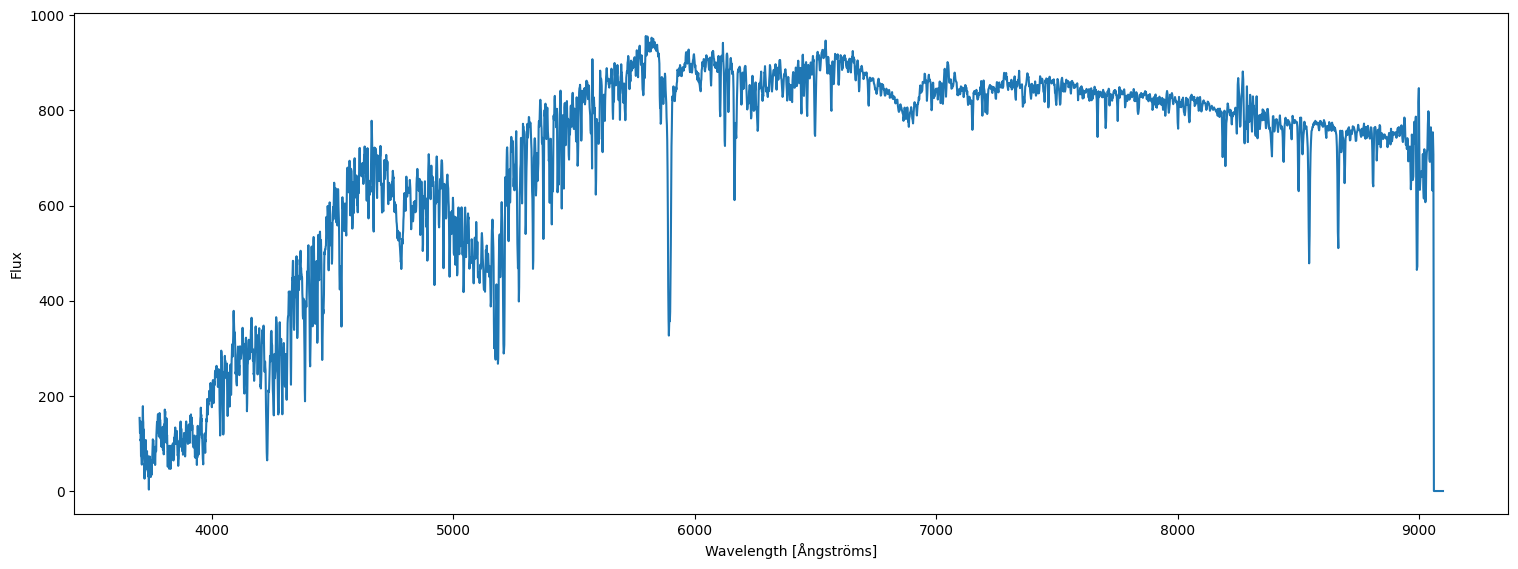

In [20]:
#plot local low resolution spectrum
lm.plot_lrs_fits('spec-57278-EG224429N215706B01_sp01-001.fits.gz')

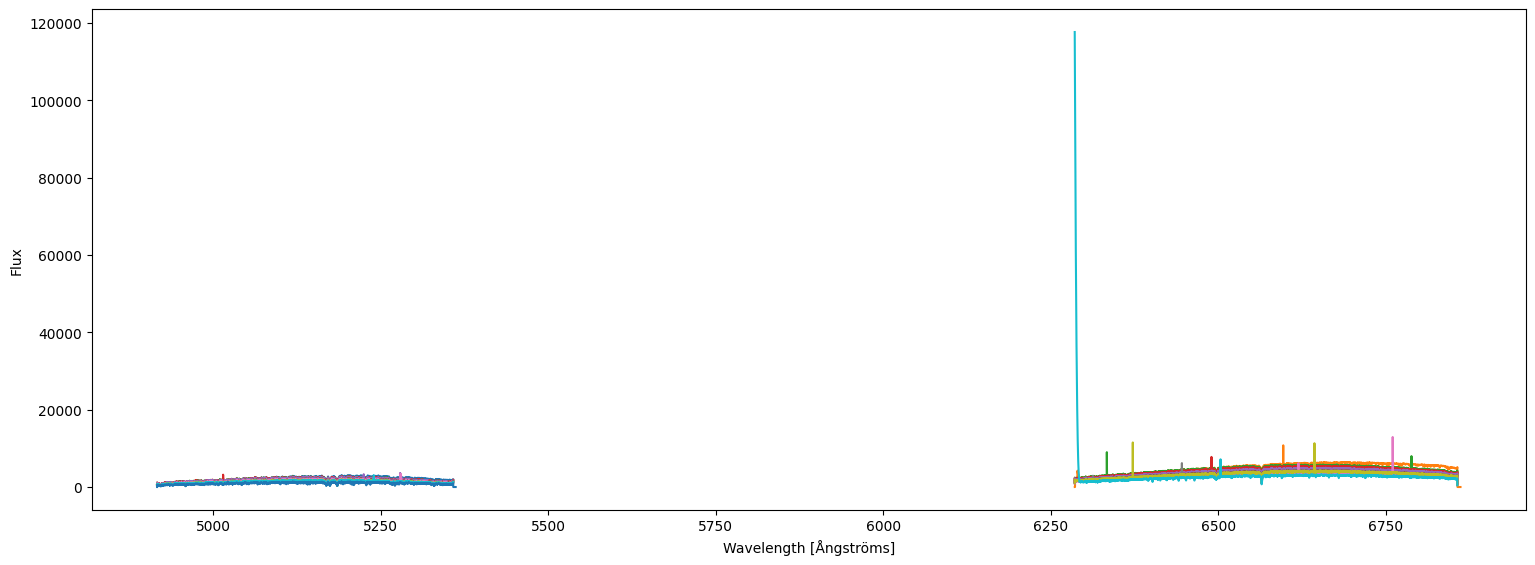

In [21]:
#plot local medium resolution spectrum
lm.plot_mrs_fits('med-58025-HIP507401_sp02-003.fits.gz')